In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Nov 22 07:49:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
os.chdir('/content/gdrive/My Drive/Cheat Detection')
!ls

 10s_resized_yolo_processed.mp4
 10s_resized_yolo_processed_version2.mp4
 40s_resized_yolo_processed.mp4
'cheat_detection (1).hdf5'
 cheat_detection_40s_resized_yolo_processed.mp4
 cheat_detection_classifier_model.h5
 cheat_detection.hdf5
 cheat_detection_improved.hdf5
 cheat_detection_improved_version2.hdf5
 cheat_detection_improved_version4.hdf5
 cheat_detection_improved_version5.hdf5
 cheat_detection_resized_yolo_processed.mp4
 clip222_yolo_processed.mp4
 data
 dataset
 gaoqing1_yolo_processed.mp4
 history.log
'ISY5004 E-Invigilator.gdoc'
'Passing Notes.jpg'
 Peeping.jpg
'Project Introduction Video_Team 6.mp4'
 test-1.JPG
 test-2.JPG
 test-3.JPG
 test-4.JPG
 test-5.JPG
 test_video_3_processed.mp4
 training_dataset
 video_test_Trim.mp4


In [4]:
# Load library
import cv2
import sys
import numpy as np
import random
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
import re
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.0


# **Below is the CNN model.**

In [ ]:
from __future__ import division
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np
import os

def create_model():
  inception = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
  inception.trainable=False
  base = inception.output
  x = GlobalAveragePooling2D(name='GlobalPooling')(base)
  x = Dense(128,activation='relu',name='Dense1')(x)
  x = Dropout(0.2,name='Dropout1')(x)
  x = Dense(128,activation='relu',name='Dense2')(x)
  x = Dropout(0.2,name='Dropout2')(x)
  predictions = Dense(3, activation='softmax',name='output')(x)
  model = Model(inputs=inception.input, outputs=predictions)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

In [ ]:
K.clear_session()
batch_size=128
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = '/content/gdrive/My Drive/Cheat Detection/training_dataset'
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 360 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


In [ ]:
checkpointer = ModelCheckpoint(filepath='best_model_class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')
history_class = model.fit(train_generator,
              steps_per_epoch = train_generator.samples // batch_size,
              validation_data=validation_generator,
              validation_steps=validation_generator.samples // batch_size,
              epochs=30,
              verbose=1,
              callbacks=[csv_logger, checkpointer])

model.save('cheat_detection.hdf5')

Epoch 1/30
2/2 [==============================] - 123s 62s/step - loss: 1.1337 - accuracy: 0.3578
Epoch 2/30
2/2 [==============================] - 3s 2s/step - loss: 1.1029 - accuracy: 0.4052
Epoch 3/30
2/2 [==============================] - 3s 2s/step - loss: 1.0707 - accuracy: 0.4698
Epoch 4/30
2/2 [==============================] - 3s 2s/step - loss: 1.0056 - accuracy: 0.4570
Epoch 5/30
2/2 [==============================] - 3s 2s/step - loss: 0.9894 - accuracy: 0.4805
Epoch 6/30
2/2 [==============================] - 3s 2s/step - loss: 0.9322 - accuracy: 0.5508
Epoch 7/30
2/2 [==============================] - 3s 2s/step - loss: 0.9295 - accuracy: 0.5517
Epoch 8/30
2/2 [==============================] - 3s 2s/step - loss: 0.8473 - accuracy: 0.6121
Epoch 9/30
2/2 [==============================] - 2s 1s/step - loss: 0.8403 - accuracy: 0.5819
Epoch 10/30
2/2 [==============================] - 3s 2s/step - loss: 0.8553 - accuracy: 0.6121
Epoch 11/30
2/2 [=============================

In [5]:
# Loading the model
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/gdrive/My Drive/Cheat Detection/cheat_detection.hdf5',compile=False)

In [6]:
# labels of 101 classes of food
cheat_list=['not_cheating','passing_notes','peeping']

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for student_img in images:
    student_img = image.load_img(student_img, target_size=(299, 299))
    student_img = image.img_to_array(student_img)                    
    student_img = np.expand_dims(student_img, axis=0)    
    student_img /= 255. 
    prediction = loaded_model.predict(student_img)
    index = np.argmax(prediction)
    cheat_list.sort()
    predicted_name = cheat_list[index]
    print(predicted_name)

# **Below is the pose estimation shown as skeleton.**

In [ ]:
ptsLbl      = ['Nose', 'Neck', 'R:Shoulder', 'R:Elbow', 'R:Wrist', 'L:Shoulder', 'L:Elbow', 'L:Wrist', 'R:Hip', 'R:Knee', 'R:Ankle',
               'L:Hip', 'L:Knee', 'L:Ankle', 'R:Eye', 'L:Eye', 'R:Ear', 'L:Ear'] 

links       = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7], [1,8], [8,9], [9,10], [1,11], [11,12], [12,13], [1,0],
               [0,14], [14,16], [0,15], [15,17], [2,17], [5,16]] 

pafCh       = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], [19,20], [21,22], [23,24], [25,26], [27,28], 
               [29,30], [47,48], [49,50], [53,54], [51,52], [55,56], [37,38], [45,46]]

colours     = [[0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255], [0,255,0], [255,200,100],
               [255,0,255], [0,255,0], [255,200,100], [255,0,255], [0,0,255], [255,0,0], [200,200,0], [255,0,0], [200,200,0], [0,0,0]]

ptColours   = [[0,100,255], [0,100,255], [0,100,255], [0,255,0], [0,255,255], [0,100,255], [0,255,0], [0,255,255], [255,0,255],
               [0,0,255], [255,0,0], [255,0,255], [0,0,255], [255,0,0], [0,0,0], [0,0,0], [200,200,0], [200,200,0]]

print(ptsLbl)

['Nose', 'Neck', 'R:Shoulder', 'R:Elbow', 'R:Wrist', 'L:Shoulder', 'L:Elbow', 'L:Wrist', 'R:Hip', 'R:Knee', 'R:Ankle', 'L:Hip', 'L:Knee', 'L:Ankle', 'R:Eye', 'L:Eye', 'R:Ear', 'L:Ear']


In [ ]:
def searchPts(prMap, prThres=0.1):
    blur = cv2.GaussianBlur(prMap, (3,3), 0, 0) 
    mask = np.uint8(blur > prThres)
    pts = []

    if cv2.__version__ == '3.4.2': 
        (_,ctrs,_) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    else:
        (ctrs,_) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for ctr in ctrs:
        blobs = np.zeros(mask.shape)
        blobs = cv2.fillConvexPoly(blobs, ctr, 1)
        blob = blur*blobs
        (_,maxVal, _,maxLoc) = cv2.minMaxLoc(blob) 
        pts.append(maxLoc + (prMap[maxLoc[1],maxLoc[0]],))
    return (pts,mask)

print(searchPts)

<function searchPts at 0x7f0cc8218950>


In [ ]:
def getAllPoints(cfMaps, imgWidth, imgHeight, cfThres=0.1, numOfKeyPts=18):
    ptGrp = []
    ptList = np.zeros((0,3))
    idx = 0
    for keyPts in range(numOfKeyPts):
        prMap = cfMaps[0,keyPts,:,:]
        prMap = cv2.resize(prMap, (imgWidth,imgHeight))
        (pts,_) = searchPts(prMap, prThres=cfThres)
        ptWithId = []
        for pt in range(len(pts)):
            ptWithId.append(pts[pt] + (idx,))
            ptList  = np.vstack([ptList, pts[pt]])
            idx = idx+1
        ptGrp.append(ptWithId)
    return (ptGrp,ptList)

print(getAllPoints)

<function getAllPoints at 0x7f0cd6883d90>


In [ ]:
def getAllLinks(pafs, links, linkCh, ptGrp, imgSize, numOfPtsForLine=10, pafThres=0.1, cfThres=0.7):
    linksWithPairs = []
    linksNoPairs = []
    (H,W) = imgSize
    for l in range(len(linkCh)):
        paf0 = output[0,pafCh[l][0],:,:]
        paf1 = output[0,pafCh[l][1],:,:]
        paf0 = cv2.resize(paf0,  (W,H))
        paf1 = cv2.resize(paf1, (W,H))
        linkPt0 = links[l][0]
        linkPt1 = links[l][1]
        pts0 = ptGrp[linkPt0]  
        pts1 = ptGrp[linkPt1] 
        numOfPts0   = len(pts0)
        numOfPts1   = len(pts1)

        if (numOfPts0 != 0 and numOfPts1 !=0):
            inPairs = np.zeros((0,3))
            
            for i in range(numOfPts0):
                maxScore  = -1
                maxj = -1
                linkLocated = 0
                
                for j in range(numOfPts1):
                    dij = np.subtract(pts1[j][:2],pts0[i][:2])
                    norm = np.linalg.norm(dij)
                    if norm:
                        dij = dij/norm
                    linePts = list(zip(np.linspace(pts0[i][0], pts1[j][0], num=numOfPtsForLine), np.linspace(pts0[i][1], pts1[j][1], num=numOfPtsForLine)))        
                    pafVectors = []
                    for k in range(len(linePts)):                            
                        vector = [paf0[int(round(linePts[k][1])), int(round(linePts[k][0]))], paf1[int(round(linePts[k][1])), int(round(linePts[k][0]))]]
                        pafVectors.append(vector)
                    
                    pafScore = np.dot(pafVectors,dij)
                    avgPafScore = sum(pafScore)/len(pafScore)  
                    ptsBydThres = np.where(pafScore > pafThres) 
                    ptsBydThres = ptsBydThres[0]  
                    
                    if (len(ptsBydThres)/numOfPtsForLine) > cfThres:
                        if avgPafScore > maxScore:
                            maxj = j
                            maxScore = avgPafScore
                            linkLocated = 1
                if linkLocated:
                    inPairs = np.append(inPairs, [[pts0[i][3],pts1[maxj][3],maxScore]], axis=0)
            if inPairs.shape[0] == 0:
                linksNoPairs.append(l)
                linksWithPairs.append([])
            else:
                linksWithPairs.append(inPairs)
        else:
            linksNoPairs.append(l)
            linksWithPairs.append([])
            
    return (linksWithPairs,linksNoPairs)

print(getAllLinks)

<function getAllLinks at 0x7f0cc82bb400>


In [ ]:
def getPersons(linksWithPairs, linksNoPairs, selLinks,  ptList):
    persons = -1*np.ones((0,19)) 
    for k in range(len(selLinks)):
        if k not in linksNoPairs: 
            jointsOf0   = linksWithPairs[k][:,0]
            jointsOf1   = linksWithPairs[k][:,1]
            (jointIdxOf0,
             jointIdxOf1)=np.array(selLinks[k])

            for i in range(len(jointsOf0)):
                exist   = 0
                personId= -1
                
                for j in range(len(persons)):
                    if persons[j][jointIdxOf0]  == jointsOf0[i]:
                        personId= j
                        exist   = 1
                        break
                        
                if exist:
                    persons[personId][jointIdxOf1]  = jointsOf1[i]
                    ptScoreOf1 = ptList[jointsOf1[i].astype(int),2]
                    linkScore = linksWithPairs[k][i][2]
                    persons[personId][-1] +=ptScoreOf1 + linkScore

                else:
                    newPerson       = -1*np.ones(19)
                    newPerson[jointIdxOf0]  = jointsOf0[i]
                    newPerson[jointIdxOf1]  = jointsOf1[i]
                    
                    ptScoreOf0              = ptList[jointsOf0[i].astype(int),2]
                    ptScoreOf1              = ptList[jointsOf1[i].astype(int),2]
                    linkScore               = linksWithPairs[k][i][2]
                    newPerson[-1]           = ptScoreOf0+ptScoreOf1+linkScore
                    
                    persons                 = np.vstack([persons,newPerson])
    return persons

print(getPersons)

<function getPersons at 0x7f0cbdb31f28>


In [ ]:
def drawSkeleton(image, selLinks, persons, ptList, lineColours, ptColours, pltThres=4):
    
    for l in range(len(persons)):
        if persons[l,-1] > pltThres:
            for i in range(len(selLinks)):
                link    = persons[l,np.array(selLinks[i])]
                link    = link.astype(int)
                if -1 in link:
                    continue
                pt0     = np.int32(ptList[link[0],:2])
                pt1     = np.int32(ptList[link[1],:2])
                cv2.line(image, (pt0[0],pt0[1]), (pt1[0],pt1[1]), lineColours[i], 3, cv2.LINE_AA)
            pts     = persons[l]
            for j in range(len(pts)-1):
                if pts[j] == -1:
                    continue
                #print(pts[j])
                pt  = np.int32(ptList[int(pts[j]),:2])
                
                cv2.circle(image, (pt[0],pt[1]), 5, [255,255,255], -1, cv2.LINE_AA)
                cv2.circle(image, (pt[0],pt[1]), 5, ptColours[j], 1, cv2.LINE_AA)
    return image

print(drawSkeleton)

<function drawSkeleton at 0x7f0cc8218ea0>


In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
timeBegin   = time.time() 
img         = cv2.imread("/content/gdrive/My Drive/Cheat Detection/data/captured-2.JPG")
prototxt    = "/content/gdrive/My Drive/Cheat Detection/data/pose_deploy_linevec.prototxt"
caffemodel  = "/content/gdrive/My Drive/Cheat Detection/data/pose_iter_440000.caffemodel"
net         = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)          
(H,W,_)     = img.shape
iptH        = 360
iptW        = int((iptH/H)*W)
blob        = cv2.dnn.blobFromImage(image=img, scalefactor=1.0/255, size=(iptW,iptH), mean=(0,0,0), swapRB=False, crop=False)
net.setInput(blob)
output      = net.forward()

print("Duration: %.2fs" % (time.time()-timeBegin)) 

AttributeError: ignored

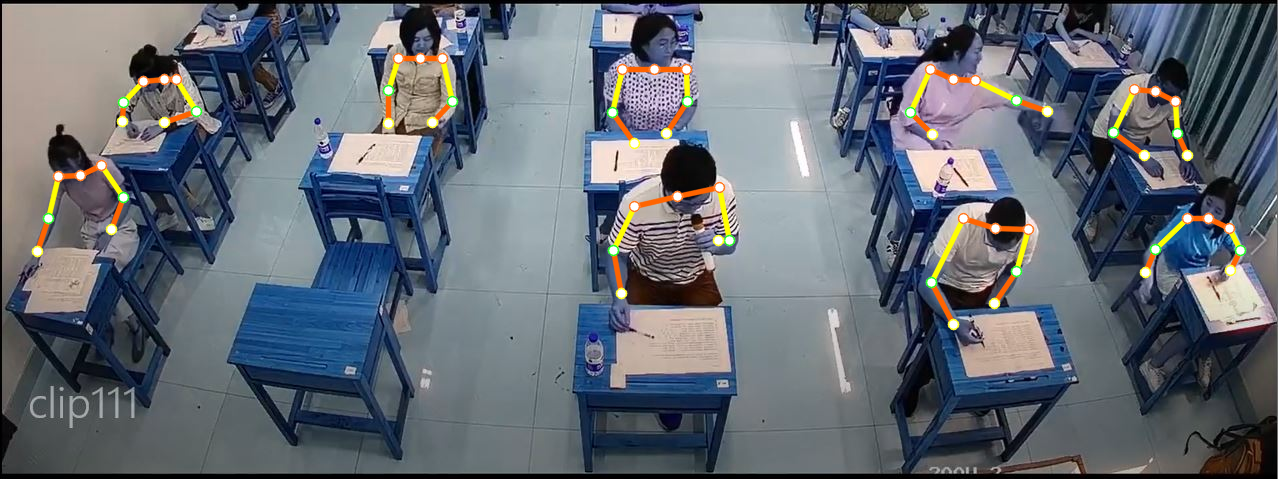

In [ ]:
# Type your code below
from google.colab.patches import cv2_imshow
(ptGrp,ptList) = getAllPoints(cfMaps=output, imgWidth=W, imgHeight=H)
(linksWithPairs, linksNoPairs) = getAllLinks(output, links, pafCh, ptGrp, (H,W))
persons = getPersons(linksWithPairs, linksNoPairs, links[0:6], ptList)
sklImg = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
skel = drawSkeleton(sklImg, links[0:6], persons, ptList, colours, ptColours)
cv2_imshow(sklImg)

In [ ]:
print(len(persons))

10


In [ ]:
test_video = cv2.VideoCapture('/content/gdrive/My Drive/Cheat Detection/data/clip222.mp4')
frame_array = [] # store the processed frames then convert them into video
i = 1
while(test_video.isOpened()):
  ret, frame = test_video.read()
  if ret == False:
    break
  frame_array.append(frame)

test_video.release()
cv2.destroyAllWindows() 

In [ ]:
img_array = []

for img in frame_array:
  prototxt = "/content/gdrive/My Drive/Cheat Detection/data/pose_deploy_linevec.prototxt"
  caffemodel  = "/content/gdrive/My Drive/Cheat Detection/data/pose_iter_440000.caffemodel"
  net = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)                                                                                 # Step 4
  (H,W,_) = img.shape
  iptH = 360
  iptW = int((iptH/H)*W)
  blob = cv2.dnn.blobFromImage(image=img,scalefactor=1.0/255,size=(iptW,iptH),mean=(0,0,0),swapRB=False,crop=False)                                                                              # Step 5
  net.setInput(blob)
  output = net.forward()
  (ptGrp,ptList) = getAllPoints(cfMaps=output, imgWidth=W, imgHeight=H)
  (linksWithPairs, linksNoPairs) = getAllLinks(output, links, pafCh, ptGrp, (H,W))
  persons = getPersons(linksWithPairs, linksNoPairs, links[0:6], ptList)
  sklImg = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
  skel = drawSkeleton(sklImg, links[0:6], persons, ptList, colours, ptColours)
  img_array.append(sklImg)
  print("Done: "+str(len(img_array))+" frames")

Done: 1 frames
Done: 2 frames
Done: 3 frames
Done: 4 frames
Done: 5 frames
Done: 6 frames
Done: 7 frames
Done: 8 frames
Done: 9 frames
Done: 10 frames
Done: 11 frames
Done: 12 frames
Done: 13 frames
Done: 14 frames
Done: 15 frames
Done: 16 frames
Done: 17 frames
Done: 18 frames
Done: 19 frames
Done: 20 frames
Done: 21 frames
Done: 22 frames
Done: 23 frames
Done: 24 frames
Done: 25 frames
Done: 26 frames
Done: 27 frames
Done: 28 frames
Done: 29 frames
Done: 30 frames
Done: 31 frames
Done: 32 frames
Done: 33 frames
Done: 34 frames
Done: 35 frames
Done: 36 frames
Done: 37 frames
Done: 38 frames
Done: 39 frames
Done: 40 frames
Done: 41 frames
Done: 42 frames
Done: 43 frames
Done: 44 frames
Done: 45 frames
Done: 46 frames
Done: 47 frames
Done: 48 frames
Done: 49 frames
Done: 50 frames
Done: 51 frames
Done: 52 frames
Done: 53 frames
Done: 54 frames
Done: 55 frames
Done: 56 frames
Done: 57 frames
Done: 58 frames
Done: 59 frames
Done: 60 frames
Done: 61 frames
Done: 62 frames
Done: 63 frames
D

In [ ]:
result = cv2.VideoWriter('clip222_processed.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 15, (1920,1080))
for i in range(len(img_array)):
  result.write(img_array[i])
result.release()